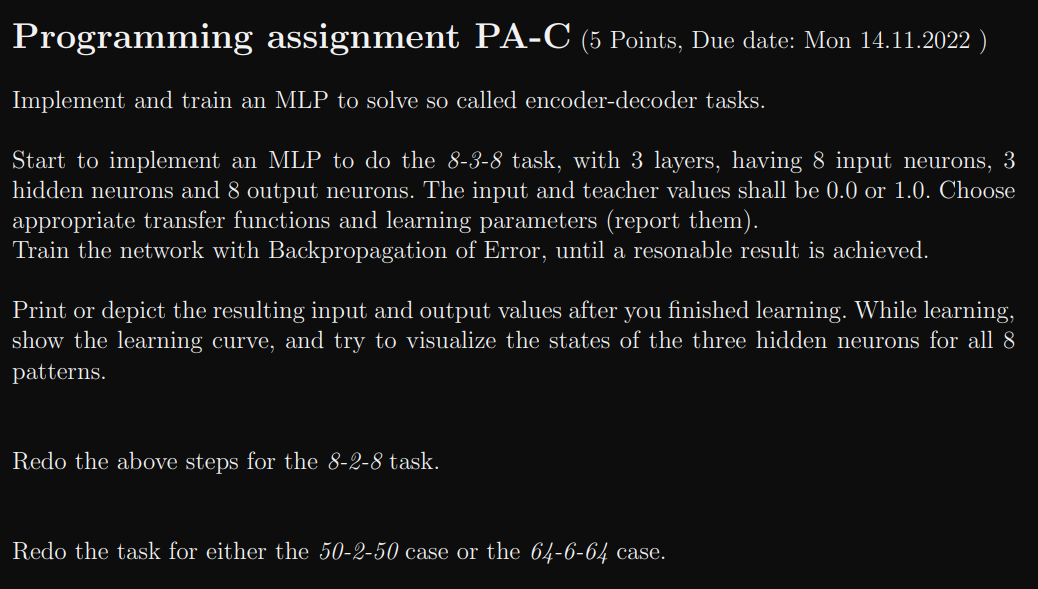

In [17]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [146]:
def generate_training_data(n_bits):
  X = []
  for i in range(n_bits):
    new_arr = np.zeros(n_bits)
    new_arr[i] = 1
    X.append(new_arr)
  return np.array(X)

print(generate_training_data(8))

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [198]:
def train_autoencoder(n_input, n_hidden):
  X = generate_training_data(n_input)

  model = keras.models.Sequential([
    keras.layers.Input(shape=(n_input, )),
    keras.layers.Dense(n_hidden, activation="relu", name='hidden'),
    keras.layers.Dense(n_input, activation="sigmoid", name='output')
  ])

  opt = keras.optimizers.Adam(learning_rate=0.1)
  model.compile(opt, loss='binary_crossentropy', metrics=['accuracy'],)

  early_stopping = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0003, patience=15)

  history = model.fit(X, X, epochs=700, verbose=0, callbacks=[early_stopping])

  print('actual:', X[0:2], '\npredicted:', model.predict(np.array(X[0:2])))

  plt.plot(history.history['loss'])
  plt.title('loss')
  plt.show()

  for layer in model.layers:
    print(layer.name)
    weights, biases = layer.get_weights()
    print('weights', weights)
    print('biases', biases)

8-3-8 autoencoder
1/1 [==============================] - 0s 57ms/step
actual: [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]] 
predicted: [[9.6319795e-01 8.6510256e-03 6.3809410e-02 0.0000000e+00 0.0000000e+00
  1.6082146e-22 5.6935216e-05 1.5077804e-19]
 [6.7933880e-02 9.6162820e-01 9.2057459e-04 4.6572973e-18 5.5985321e-21
  1.5143089e-02 6.5951375e-05 1.7709374e-10]]


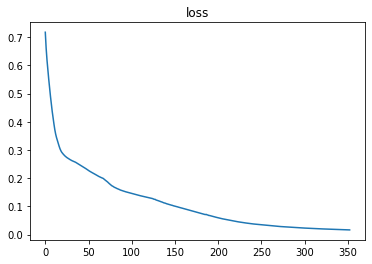

hidden
weights [[ 3.890927   -1.3303652  -0.14023685]
 [-0.8316217  -3.3127522  -0.61760455]
 [10.161862    7.3626666  -0.15740079]
 [-3.3525805  -2.8509934  -0.07239014]
 [-3.433895   -1.0271145  -0.20667997]
 [-2.8913171  -3.337604   -0.7031281 ]
 [ 2.843446   11.172103   -0.40916854]
 [-2.189793    3.5198514  -0.63792694]]
biases [ 3.3705134  3.3241236 -0.5871404]
output
weights [[ 2.3575914e+00  2.9277394e+00  9.1238177e-01 -1.7561834e+01
  -1.6952024e+01 -3.1495519e+00 -4.4044441e-01 -5.5252309e+00]
 [-2.6484566e+00 -1.0991338e+01 -2.5695977e-03 -3.8551250e+00
   2.8207328e+00 -1.5704745e+01  9.7509062e-01  2.6276593e+00]
 [-1.0118210e+00 -3.6284441e-01 -5.9683949e-01 -1.0009649e+00
   1.5176083e+00 -1.0163039e-01 -2.0604116e-01 -3.1093565e-01]]
biases [-8.574422  -4.086922  -9.306001   4.723341  -3.6245012  4.0000033
 -8.519374  -8.456259 ]


In [188]:
print('8-3-8 autoencoder')
train_autoencoder(8, 3)

8-2-8 autoencoder
1/1 [==============================] - 0s 53ms/step
actual: [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]] 
predicted: [[8.9967763e-01 3.4334254e-02 1.4629524e-04 8.5794811e-05 5.8193036e-06
  1.3582352e-04 4.6738449e-05 5.2293055e-02]
 [3.4964602e-02 9.2617512e-01 2.4127628e-04 1.0723257e-03 5.1809955e-02
  5.1110248e-05 2.1330571e-09 5.2362545e-09]]


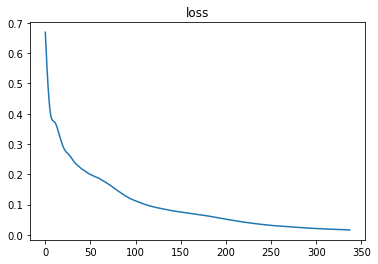

hidden
weights [[-3.6853285  -2.2191393 ]
 [-2.4955802  -2.9675307 ]
 [14.010945    9.260499  ]
 [ 7.727163   -0.81363624]
 [ 1.0272063  -2.7927241 ]
 [ 0.8205626  13.270686  ]
 [-3.125279    5.1185393 ]
 [-4.014556   -0.07809816]]
biases [3.98518   2.8566487]
output
weights [[ -6.574522    -1.5938327    0.5273851    1.2780445    1.95261
   -0.3483428   -7.1264935  -13.141632  ]
 [ -3.624339   -12.175981     0.19928321  -1.578114   -10.704529
    0.883149     2.3781307    0.8395858 ]]
biases [ 6.475578   4.90354   -9.11492   -8.740627  -5.81558   -9.362583
 -9.350088   0.5081114]


In [189]:
print('8-2-8 autoencoder')
train_autoencoder(8, 2)

64-6-64 autoencoder
1/1 [==============================] - 0s 45ms/step
actual: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
predicted: [[9.87123251e-01 5.63396877e-13 1.74679116e-09 9.91610438e-09
  2.27113144e-15 3.06638656e-04 6.51902032e-10 4.51566244e-04
  1.20162449e-10 8.02683076e-07 2.73923292e-17 4.57274813e-16
  1.63668545e-07 5.56890058e-22 7.07440329e-09 2.56056501e-05
  3.15903463e-08 2.27815017e-05 8.28508906e-09 9.40611199e-15
  7.04022938e-08 4.94611547e-22 5.89277498e-12 1.25679895e-17
  2.66320928e-12 1.21824556e-07 2.36309889e-15 7.92889841e-06
  1.84173336e-06 1.47211348e-16 2.26382012e-17 5.93041514e-05
  1.36690048e

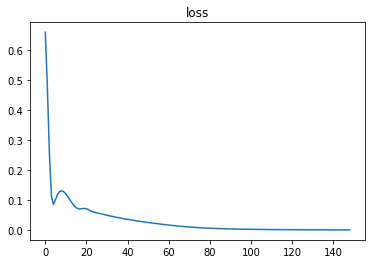

hidden
weights [[ 0.3176664  -1.6410408  -1.7373257   3.9758332   0.21145341  1.44507   ]
 [ 0.69693434  3.9152713  -0.74476886  1.0023018  -2.7942572  -0.01472283]
 [-0.44392332  3.774105   -1.7383082  -1.2378739  -0.87358534  0.47941792]
 [ 4.585557    0.10199011  0.93915373  1.8907063  -2.3942735   1.0295305 ]
 [ 2.6400278   0.9953108   2.2363622  -1.2892946   2.4699426  -1.9145368 ]
 [-2.257587   -0.49171534 -0.62172025  2.8657286   1.7799608   3.0647645 ]
 [-1.7594173   3.1299276  -1.1152266   1.270574   -1.0146865   3.5133617 ]
 [ 0.51182246 -0.43596363  0.5173636   4.8121514  -2.3947842   0.09343043]
 [-0.3167687  -1.6371577   3.798895    1.1399298   0.41931725 -1.8777709 ]
 [ 4.1738415  -1.6355709   1.290407    0.08092729 -0.4470874   3.1542304 ]
 [ 2.5728996   1.7362996   1.925296   -1.288668   -2.8157547   1.8257581 ]
 [ 1.3356518   3.9492085   0.06227867 -1.345881   -0.224524   -1.9022517 ]
 [-1.5477532  -0.7116559   0.48549816  0.97921866  4.9032893   1.7221721 ]
 [-0.08882

In [199]:
print('64-6-64 autoencoder')
train_autoencoder(64, 6)